# **THE COMPARISON OF MACHINE LEARNING MODEL FOR CREDIT CARD DEFAULT PREDICTION**

NAME  : RAIHAN RAFIF

BATCH : HCK-001

# **I. INTRODUCTION**

The use of credit cards today is increasingly prevalent. The convenience provided in transacting using a credit card makes more and more people use it. Credit cards basically allow users to transact using credit from banks within a certain period and limit. The limit is determined by the bank based on the bank's estimate of the user's ability to pay credit bills within that period. Generally, the credit card term used is at the end of each month. However, if the user does not make a payment by the specified deadline, the bank will apply a penalty in the form of additional fees or fines. Based on economic data from the Federal Reserve, credit card arrears have increased sharply since 2016. However, in 2020, they experienced a sharp decline. This was also due to a charge-off policy by banks due to the COVID-19 pandemic situation that has recently hit the world. Of course, this causes huge losses for the bank that has provided credit card services for its users who have arrears in repayment. This risk can actually be minimized if the bank can predict the level of possibility of failing to pay. If this can be done, the bank certainly has more options to cope with large losses that occur due to payment failures or arrears due to credit cards by providing other options for credit card users.

The existence of machine learning has greatly helped many needs in various fields. Especially in policy determinations that leverage predictions made by machine learning models generated from pre-owned data sets. There are many machine learning models that can be utilized, such as logistic regression, support vector machine (SVM), k-nearest neighbors, and Naive Bayes. In addition, there are also tree-based models and ensemble learning such as decision trees, random forests, and extreme gradient boosting (xg-boost). These models can be used to predict which credit card users are likely to default and which credit card users are not. Then the performance of these models can also be compared by evaluating the model and then determining which hyperparameter has a value to produce the best model.

## **1. Objective**

1. Create a machine learning logistic regression model, support vector machine (svm), decision trees model, random forests model, k-nearest neighbors (knn) model, naive bayes model, and gradient boosting model to predict default users on credit cards.
2. Compare machine learning models built to predict user defaults on credit cards and determine the best model.
3. Perform hyperparameter tuning for the best prediction model.

# **II. EXPLORATORY DATA ANALYSIS (EDA)**

## **1. Importing Libraries**

In [1]:
# Importing the libraries used
import pandas as pd
import numpy as np

#For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For ouliers handling
from feature_engine.outliers import Winsorizer

# For feature selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# For cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# For modeling problems
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# For model evaluation
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Split dataset and standarize the datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# For ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **2. Loading The Data**

**Data was extracted from google cloud big query using the following query :**
~~~~sql
SELECT * EXCEPT (id, predicted_default_payment_next_month)
FROM `bigquery-public-data.ml_datasets.credit_card_default`

~~~~
**From the link below :**

https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table

In [2]:
# Loading csv data into dataframe
df = pd.read_csv(r'D:\FTDS Boothcamp Hacktiv8\Phase 1\W2\Milestone 1\p1---ftds-001-hck--ml1-rhnrff\h8dsft_P1M1_raihan_rafif.csv')

In [3]:
# Making every columns can be displayed
pd.set_option('display.max_columns', None)

In [4]:
# Showing head of the dataframe
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,-1,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,-1,280,6852,486,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,-2,0,47,207,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,-1,0,2920,0,0,0,6753,2920,0,0,0,6753,0,1


In [5]:
# Showing the data shape
df.shape

(2965, 24)

There are 24 features in the data frame with 2965 populations. The data above is data that contains information related to credit card users of a bank. There is general information about users such as gender, level of education, marital status, and age. In addition, information related to credit card usage provided in the data includes credit limit, payment statement, amount of bill statement, amount of previous payment, and default status. The default status data here will be used as target data in making prediction models using parameters obtained from other features.

## **3. Data Dictionary**

- limit_balace : Amount of given credit (USD)


- sex : Gender.


    - 1 = Male


    - 2 = Female


- education_level : Education level of credit card users.


    - 1 = Graduate School


    - 2 = University


    - 3 = High School


    - 4 = Others


- marital_status : Credit card user's marriage status.


    - 1 = Married


    - 2 = Single


    - 3 = Others


- age : Age (years).


- pay_0 : Repayment status in September, 2005.
    - -1 = Pay duly


    -  1 = Payment delay for one month


    -  2 = Payment delay for two months


    -  3 = Payment delay for three months


    -  4 = Payment delay for four months


    -  5 = Payment delay for five months


    -  6 = Payment delay for six months


    -  7 = Payment delay for seven months


    -  8 = Payment delay for eight months


    -  9 = Payment delay for nine months and above


- pay_2 : Repayment status in August, 2005.
    - Scale same as above



- pay_3 : Repayment status in July, 2005.
    - Scale same as above



- pay_4 : Repayment status in June, 2005.
    - Scale same as above



- pay_5 : Repayment status in May, 2005.
    - Scale same as above



- pay_6 : Repayment status in April, 2005.
    - Scale same as above



- bill_amt_1 : Amount of bill statement in September, 2005 (USD).


- bill_amt_2 : Amount of bill statement in August, 2005 (USD).


- bill_amt_3 : Amount of bill statement in July, 2005 (USD).


- bill_amt_4 : Amount of bill statement in June, 2005 (USD).


- bill_amt_5 : Amount of bill statement in May, 2005 (USD).


- bill_amt_6 : Amount of bill statement in April, 2005 (USD).


- pay_amt_1 : Amount of previous payment in September, 2005 (USD).


- pay_amt_2 : Amount of previous payment in August, 2005 (USD).


- pay_amt_3 : Amount of previous payment in July, 2005 (USD).


- pay_amt_4 : Amount of previous payment in June, 2005 (USD).


- pay_amt_5 : Amount of previous payment in May, 2005 (USD).


- pay_amt_6 : Amount of previous payment in April, 2005 (USD).


- default_payment_next_month : Default payment.


    - 1 = Yes

    
    - 2 = No

## **4. Explorations**

**RENAMING COLUMNS**

In [6]:
# Renaming data
df.rename(columns={"default_payment_next_month" : "default", "limit_balance" : "limit", "education_level" : "education",
                   "marital_status" : "marriage", "pay_0" : "pay_1", "bill_amt_1" : "bill_1", "bill_amt_2" : "bill_2",
                   "bill_amt_3" : "bill_3", "bill_amt_4" : "bill_4", "bill_amt_5" : "bill_5", "bill_amt_6" : "bill_6",
                   "pay_amt_1" : "prep_1", "pay_amt_2" : "prep_2", "pay_amt_3" : "prep_3", "pay_amt_4" : "prep_4",
                   "pay_amt_5" : "prep_5", "pay_amt_6" : "prep_6"
}, inplace = True)

**GENERAL INFORMATION**

In [7]:
# Showing statistical information of the dataframe
df.describe()

,limit,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_1,bill_2,bill_3,bill_4,bill_5,bill_6,prep_1,prep_2,prep_3,prep_4,prep_5,prep_6,default
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637,52118.305228,50649.153120,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305,72328.670541,70785.001588,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3958.000000,3390.000000,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24257.000000,23111.000000,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69852.000000,67827.000000,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


There are some misleading features in category data, such as level of education, marital status, and payment status. When viewed from the statistical information above, the level of education data has a minimum value of 0 and a maximum value of 6, whereas when viewed from the data dictionary in the level of education column there are only 4 classes (1-4) with class 4 representing others. Then in the marital status data, it appears to have a minimum value of 0 and a maximum value of 3. In contrast, when viewed from the data dictionary in the marital status column there are only 3 classes (1-3) with class 3 representing others. Then on the payment status data, it appears to have a minimum value of -2 and a maximum value of 7 or 8. Meanwhile, when viewed from the data dictionary in the payment status column, only classes with a lower limit of - 1 represent pay duly.

In [8]:
# Identifying education uqique values
df['education'].unique()

array([1, 2, 3, 5, 4, 6, 0], dtype=int64)

There are 7 classes identified in the level of education column, from class 0 to class 6. While in the data dictionary, only 4 classes are identified as having labels. Therefore, grades 0, 5, and 6 will be included in the category of class 4 or other classes.

In [9]:
# Assigning label 0(unknown), 4(unknown), & 5(unknown) into label 4(others)
df.loc[:, 'education'] = df.loc[:, 'education'].replace(0,4)
df.loc[:, 'education'] = df.loc[:, 'education'].replace(5,4)
df.loc[:, 'education'] = df.loc[:, 'education'].replace(6,4)

In [10]:
# Identifying marriage uqique values
df['marriage'].unique()

array([2, 1, 3, 0], dtype=int64)

There are 4 classes identified in the marital status column, from class 0 to class 3. While in the data dictionary, only 3 classes are identified as having labels. Therefore, class 0 will be included in the category 3 class or other classes.

In [11]:
# Assigning label 0(unknown) into label 3(others)
df.loc[:, 'marriage'] = df.loc[:, 'marriage'].replace(0,3)

In [12]:
# Identifying repayment status uqique values
df['pay_1'].unique()

array([ 0, -1,  2,  1,  3, -2,  4,  5,  6,  7,  8], dtype=int64)

There are 2 classes identified in the payment status column, from class -2 to class 8. While in the data dictionary, only 10 classes (-1, 1, 2, 3, 4, 5, 6, 7, 8, and 9) are identified as having a label. There are classes -2 and 0 which are not in the dictionary. It was decided to include class -2 and 0 in class -1, but the label will be changed to 0 to avoid negative values in the data.

In [13]:
# Assigning label -1(unknown), -2(unknown) into label 0(pay_duly)
df.loc[:, 'pay_1'] = df.loc[:, 'pay_1'].replace(-1,0)
df.loc[:, 'pay_1'] = df.loc[:, 'pay_1'].replace(-2,0)

In [14]:
# Identifying repayment status uqique values
df['pay_2'].unique()

array([ 0,  2, -2,  3,  4,  5,  6,  7,  1, -1], dtype=int64)

In [15]:
# Assigning label -1(unknown), -2(unknown) into label 0(pay_duly)
df.loc[:, 'pay_2'] = df.loc[:, 'pay_2'].replace(-1,0)
df.loc[:, 'pay_2'] = df.loc[:, 'pay_2'].replace(-2,0)

In [16]:
# Identifying repayment status uqique values
df['pay_3'].unique()

array([ 0,  2, -1, -2,  3,  5,  6,  7,  4], dtype=int64)

In [17]:
# Assigning label -1(unknown), -2(unknown) into label 0(pay_duly)
df.loc[:, 'pay_3'] = df.loc[:, 'pay_3'].replace(-1,0)
df.loc[:, 'pay_3'] = df.loc[:, 'pay_3'].replace(-2,0)

In [18]:
# Identifying repayment status uqique values
df['pay_4'].unique()

array([ 0,  2, -1,  3,  5, -2,  4,  6,  7,  8], dtype=int64)

In [19]:
# Assigning label -1(unknown), -2(unknown) into label 0(pay_duly)
df.loc[:, 'pay_4'] = df.loc[:, 'pay_4'].replace(-1,0)
df.loc[:, 'pay_4'] = df.loc[:, 'pay_4'].replace(-2,0)

In [20]:
# Identifying repayment status uqique values
df['pay_5'].unique()

array([ 0,  2,  3,  4, -1, -2,  5,  6,  7], dtype=int64)

In [21]:
# Assigning label -1(unknown), -2(unknown) into label 0(pay_duly)
df.loc[:, 'pay_5'] = df.loc[:, 'pay_5'].replace(-1,0)
df.loc[:, 'pay_5'] = df.loc[:, 'pay_5'].replace(-2,0)

In [22]:
# Identifying repayment status uqique values
df['pay_6'].unique()

array([ 0,  2, -2, -1,  3,  4,  6,  7], dtype=int64)

In [23]:
# Assigning label -1(unknown), -2(unknown) into label 0(pay_duly)
df.loc[:, 'pay_6'] = df.loc[:, 'pay_6'].replace(-1,0)
df.loc[:, 'pay_6'] = df.loc[:, 'pay_6'].replace(-2,0)

In [24]:
# Showing general information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   limit      2965 non-null   int64
 1   sex        2965 non-null   int64
 2   education  2965 non-null   int64
 3   marriage   2965 non-null   int64
 4   age        2965 non-null   int64
 5   pay_1      2965 non-null   int64
 6   pay_2      2965 non-null   int64
 7   pay_3      2965 non-null   int64
 8   pay_4      2965 non-null   int64
 9   pay_5      2965 non-null   int64
 10  pay_6      2965 non-null   int64
 11  bill_1     2965 non-null   int64
 12  bill_2     2965 non-null   int64
 13  bill_3     2965 non-null   int64
 14  bill_4     2965 non-null   int64
 15  bill_5     2965 non-null   int64
 16  bill_6     2965 non-null   int64
 17  prep_1     2965 non-null   int64
 18  prep_2     2965 non-null   int64
 19  prep_3     2965 non-null   int64
 20  prep_4     2965 non-null   int64
 21  prep_5     296

Based on the general information obtained above, all existing data or features are numeric data with an integer type. Meanwhile, when viewed from the previous data, there are features that are actually categorical data, such as gender, level of education, marital status, payment status, and default status. These features are presented in numerical form, so it can be said that the data has been encoded, but does not change the nature of the data itself which is discrete data that is categorical. So, to simplify further processing, these features will be converted into data with non-numeric types. The default status will not be changed because it is the target data that will not affect the modeling process.

In [25]:
# Changing columns data type
df['sex'] = df['sex'].apply(str)
df['education'] = df['education'].apply(str)
df['marriage'] = df['marriage'].apply(str)
df['pay_1'] = df['pay_1'].apply(str)
df['pay_2'] = df['pay_2'].apply(str)
df['pay_3'] = df['pay_3'].apply(str)
df['pay_4'] = df['pay_4'].apply(str)
df['pay_5'] = df['pay_5'].apply(str)
df['pay_6'] = df['pay_6'].apply(str)

In [26]:
# Showing general information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   limit      2965 non-null   int64 
 1   sex        2965 non-null   object
 2   education  2965 non-null   object
 3   marriage   2965 non-null   object
 4   age        2965 non-null   int64 
 5   pay_1      2965 non-null   object
 6   pay_2      2965 non-null   object
 7   pay_3      2965 non-null   object
 8   pay_4      2965 non-null   object
 9   pay_5      2965 non-null   object
 10  pay_6      2965 non-null   object
 11  bill_1     2965 non-null   int64 
 12  bill_2     2965 non-null   int64 
 13  bill_3     2965 non-null   int64 
 14  bill_4     2965 non-null   int64 
 15  bill_5     2965 non-null   int64 
 16  bill_6     2965 non-null   int64 
 17  prep_1     2965 non-null   int64 
 18  prep_2     2965 non-null   int64 
 19  prep_3     2965 non-null   int64 
 20  prep_4     2965 non-null   int

**DEFAULT PAYMENT**

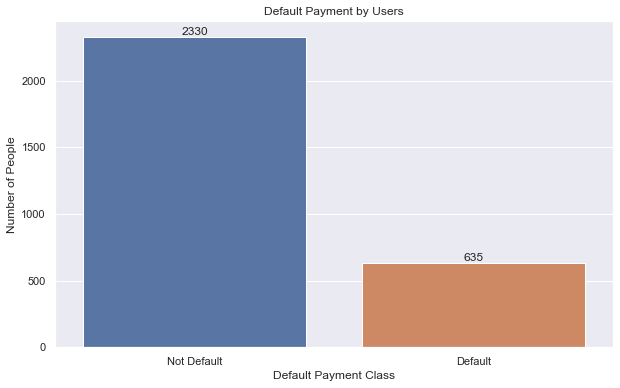

In [27]:
# Identifying target data distribution
# Setting figure size
plt.figure(figsize = (10, 6))
#set seaborn plotting aesthetics as default
sns.set()
# Count plotting
default = sns.countplot(data = df, x = 'default')
default.bar_label(default.containers[0], label_type='edge')
#Setting title and labels
plt.xticks([0,1], ['Not Default', 'Default'])
plt.title("Default Payment by Users")
plt.xlabel("Default Payment Class")
plt.ylabel("Number of People")

# Showing the plot
plt.show()

2330 of the total 2965 or 78.58% of the data population were identified as non-default credit card users, while 635 or 21.42% were identified as default credit card users. The data is very unbalanced between the default note users and the default data. Actually, this is very reasonable when viewed from the real world where most people will always pay their credit cards on time. Meanwhile, for people who have credit card payment arrears the number of defaults will not be much. Of course, this is a general assumption that the world is not in a state of economic crisis.

**GENDER**

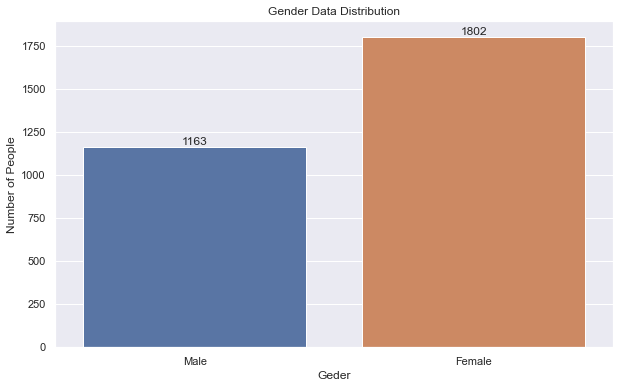

In [28]:
# Identifying gender data distribution
# Setting figure size
plt.figure(figsize = (10, 6))
#set seaborn plotting aesthetics as default
sns.set()
# Count plotting
gender = sns.countplot(data = df, x = 'sex')
gender.bar_label(gender.containers[0], label_type='edge')
#Setting title and labels
plt.xticks([0,1], ['Male', 'Female'])
plt.title("Gender Data Distribution")
plt.xlabel("Geder")
plt.ylabel("Number of People")

# Showing the plot
plt.show()

It can be seen that the distribution of data by gender is also not balanced. However, the difference is not as far as the data class difference in the default status column.

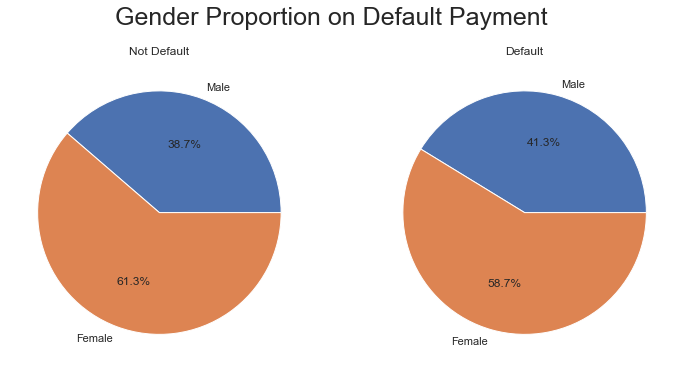

In [29]:
# Deviding gender data with default payment using pie visualization
_, axes = plt.subplots(1, 2, figsize=(12,6))
#Defining labels
labels = ['Male', 'Female']

# Plot 1
axes[0].pie(df.query('default == 0').groupby('sex')['sex'].count(), autopct="%1.1f%%", labels=labels)
axes[0].set_title('Not Default')
# Plot 2
axes[1].pie(df.query('default == 1').groupby('sex')['sex'].count(), autopct="%1.1f%%", labels=labels)
axes[1].set_title('Default')
plt.suptitle('Gender Proportion on Default Payment', fontsize=25)
# Show plot
plt.show()

In [30]:
# Showing gender value counts
df['sex'].value_counts()

2    1802
1    1163
Name: sex, dtype: int64

When viewed in each default class, 58.7% of the total population of credit card users who defaulted were women, while the remaining 41.3% were men. While in the non-default class, 61.3% are female credit card users, while the remaining 38.7% are male. This makes the default assessment of users on this credit card data cannot directly related to the gender of the user. Although the default class is dominated by female users, the not default class is also dominated by female users. The conclusion that can be drawn from the simple visualization above is that regardless of the user's default status, credit cards are mostly used by women because basically, it is generally known that women do more shopping activities than men.

**EDUCATION LEVEL**

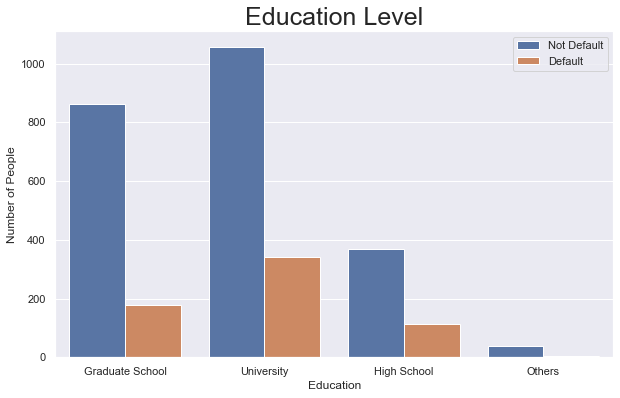

In [31]:
# Identifying education level distribution
# Setting figure size
fig, ax = plt.subplots(figsize=(10,6))
# Set seaborn plotting aesthetics as default
sns.set()

# Count plotting
sns.countplot(data=df,
              x='education',
              hue='default'
)

# Setting plot title
plt.xticks([0,1,2,3], ['Graduate School', 'University', 'High School', 'Others'])
plt.title("Education Level", fontsize=25)
plt.xlabel("Education")
plt.ylabel("Number of People")
plt.legend(['Not Default', 'Default'])

# Showing the plot
plt.show()

In [32]:
# Showing education level value counts
df['education'].value_counts()

2    1400
1    1039
3     483
4      43
Name: education, dtype: int64

The credit card users contained in the data are divided into four classes based on the level of education, namely graduate school, university, high school, and others. In general, if you look at the distribution of data on the graph, credit card users with university education status have the highest default status compared to users with other educational statuses. In addition, it can also be seen that there is no correlation between the education level of credit card user and their probability of default. However, when viewed more closely, the population of credit card users with university education status is the largest number of users. The assumption that can be taken here is that the tendency of someone to use a credit card is directly proportional to their level of education. But not so with the default state that can happen to them. This is because, in the available data, the population of users with university education status is the largest. So it cannot be concluded that the level of education is correlated with the possibility of users experiencing default.

**MARRIAGE**

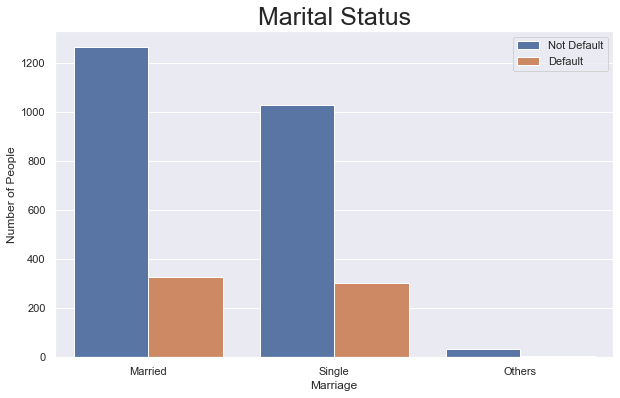

In [33]:
# Identifying marital status distribution
# Setting figure size
fig, ax = plt.subplots(figsize=(10,6))
# Set seaborn plotting aesthetics as default
sns.set()

# Count plotting
sns.countplot(data=df,
              x='marriage',
              hue='default'
)

# Setting plot title
plt.xticks([0,1,2], ['Married', 'Single', 'Others'])
plt.title("Marital Status", fontsize=25)
plt.xlabel("Marriage")
plt.ylabel("Number of People")
plt.legend(['Not Default', 'Default'])

# Showing the plot
plt.show()

In [34]:
# Showing marital status value counts
df['marriage'].value_counts()

2    1594
1    1332
3      39
Name: marriage, dtype: int64

In general, the number of credit card users with married and single statuses is quite balanced. Even when viewed from the default status or not, the two classes are also quite balanced.

**AGE**

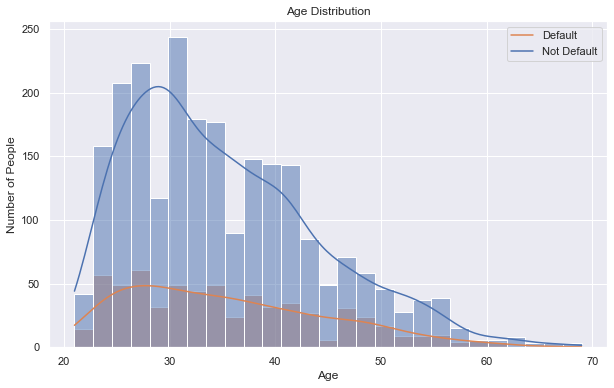

In [35]:
# Identifying age distribution
# Setting figure size
fig = plt.figure(figsize = (10, 6))
#set seaborn plotting aesthetics as default
sns.set()

# Histogram plotting
sns.histplot(data = df,
             x = "age",
             hue = 'default',
             kde = True,
             stat = 'count'
)

# Setting title, legend, and labels
plt.legend(['Default', 'Not Default'])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of People")

# Showing plot
plt.show()

Most credit card users are in the age group of 24 years to 32 years. In general, the number of credit card users decreases as users age. When viewed from the default status, it can be seen that users who default and do not default based on age have a fairly similar pattern.

**AGE VS MARRIAGE**

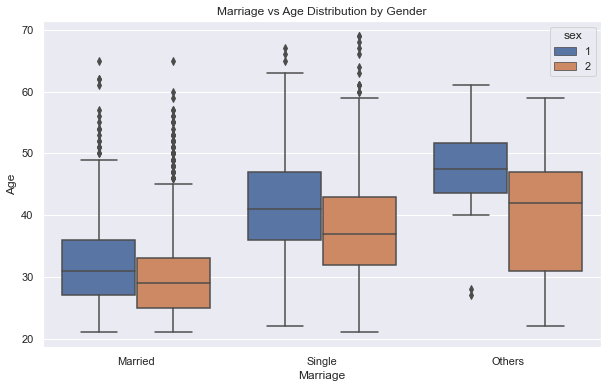

In [36]:
# Identifying marital status vs age distribusion by sex
# Setting figure size
fig = plt.figure(figsize = (10, 6))
# Set seaborn plotting aesthetics as default
sns.set()

# Box plotting
sns.boxplot(x = 'marriage',
            y = 'age',
            data = df,
            hue = "sex"
)

# Setting plot title
plt.xticks([0,1,2], ['Married', 'Single', 'Others'])
plt.title("Marriage vs Age Distribution by Gender")
plt.xlabel("Marriage")
plt.ylabel("Age")

# Showing the plot
plt.show()

If you look at the marital status with the user's age and gender, it can be seen that the average married credit card users are between the ages of 30 and 50 years. Meanwhile, users who are not married or still single are an average age of 20 years to 35 years. There is another class on marital status. When viewed from the age distribution, it can be assumed that this other class contains users with the status of having been married but already widowed or widowed because the age distribution is in the average range of 30 years to 55 years.

**LIMIT BALANCE**

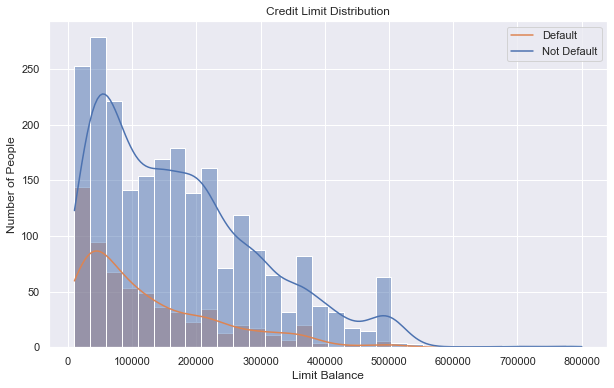

In [37]:
# Identifying credit limit distribution
# Setting figure size
fig = plt.figure(figsize = (10, 6))
#set seaborn plotting aesthetics as default
sns.set()

# Density plotting
sns.histplot(data = df,
             x = "limit",
             kde = True,
             hue = "default",
             stat = "count"
)

# Setting title, legend, and labels
plt.title("Credit Limit Distribution")
plt.legend(['Default', 'Not Default'])
plt.xlabel("Limit Balance")
plt.ylabel("Number of People")

# Showing plot
plt.show()

The distribution pattern of credit limit data is also almost the same as age, where users with a higher number of limits have a smaller population. When viewed from the default status or not, it can be concluded that the smaller the credit limit owned by the user, the higher the possibility for them to experience default. In general, banks will apply a credit card usage limit for each user based on the bank's estimate of each user's ability to make payments. Therefore, users with high credit limits can be assumed to be users who have high monthly income, so their chances of experiencing default should be smaller.

**REPAY STATEMENT**

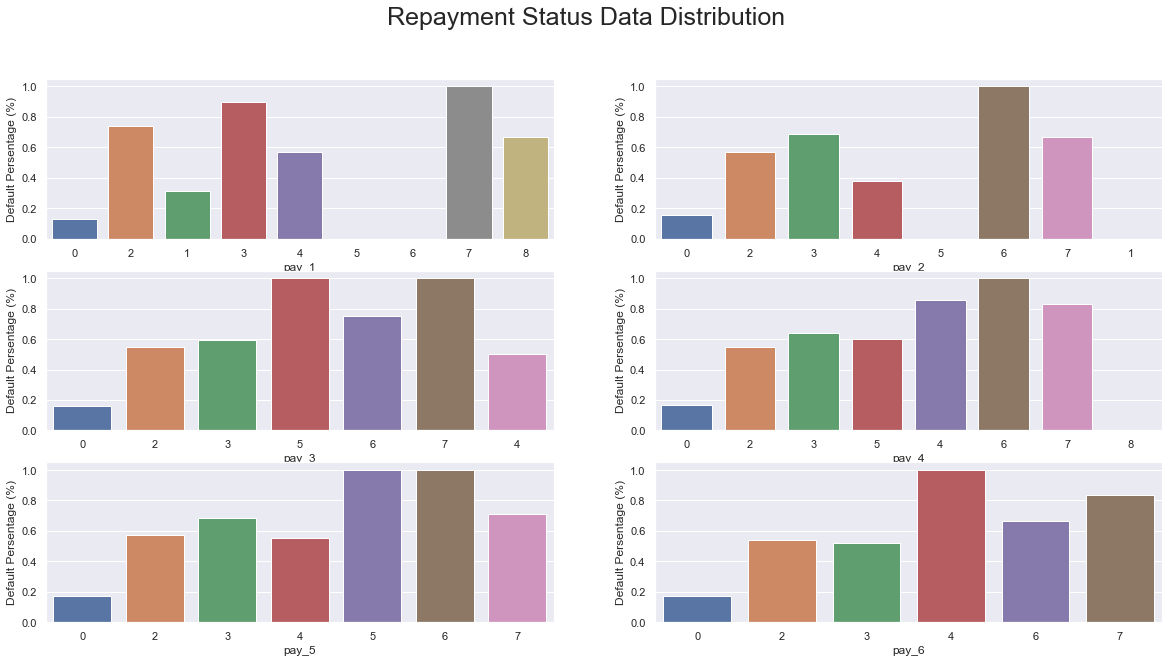

In [38]:
# Assigning repayment status into new variable
pay_all = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
# Setting figure size
plt.figure(figsize=(20,10))

for i, col in enumerate(pay_all):
    # Setting subplot    
    plt.subplot(3, 2, i+1)
    # Bar plotting
    sns.barplot(data=df, x=col, y='default', ci=None)
    # Setting lables
    plt.ylabel('Default Persentage (%)')

# Setting plot title
plt.suptitle("Repayment Status Data Distribution", fontsize=25)

# Showing the plot
plt.show()

Repayment status is the user's monthly credit card payment status. It can be seen that in April 2005 (pay_6), users with 4 months arrears were the most users. Meanwhile, in May 2005 (pay_5), users with 5 and 6 months arrears status both increased. Then in June 2005 (pay_4) and July 2005 (pay_3), users with 5, 6, and 7 months arrears status experienced an increase. The number of users with 8 months arrears status began to appear in September 2005 (pay_1). In addition, it can be seen that the number of users with no arrears status each month did not experience significant changes and tended to stagnate. Users with a 1-month arrears status in September 2005 (pay_1) experienced a considerable increase and users with no arrears status slightly decreased. This can be interpreted that in September users with no arrears status began to decrease and make payments in arrears. This can be seen clearly because previously in August 2005 (pay_2), the number of users with 1-month arrears was very small or almost non-existent.

**AMOUNT OF BILL STATEMENT**

In [39]:
# Making the copy of dataFrame
df_copy = df.copy()

In [40]:
# Making range of amount of bill statement
bill_all = ['bill_1', 'bill_2', 'bill_3', 'bill_4', 'bill_5', 'bill_6']
billr_all = ['billr_1', 'billr_2', 'billr_3', 'billr_4', 'billr_5', 'billr_6']

for i, col in enumerate(billr_all):
    # Defining range
    df_copy[col] = pd.cut(df_copy[bill_all[i]], [-150000, 0, 150000, 300000, 450000, 615000])

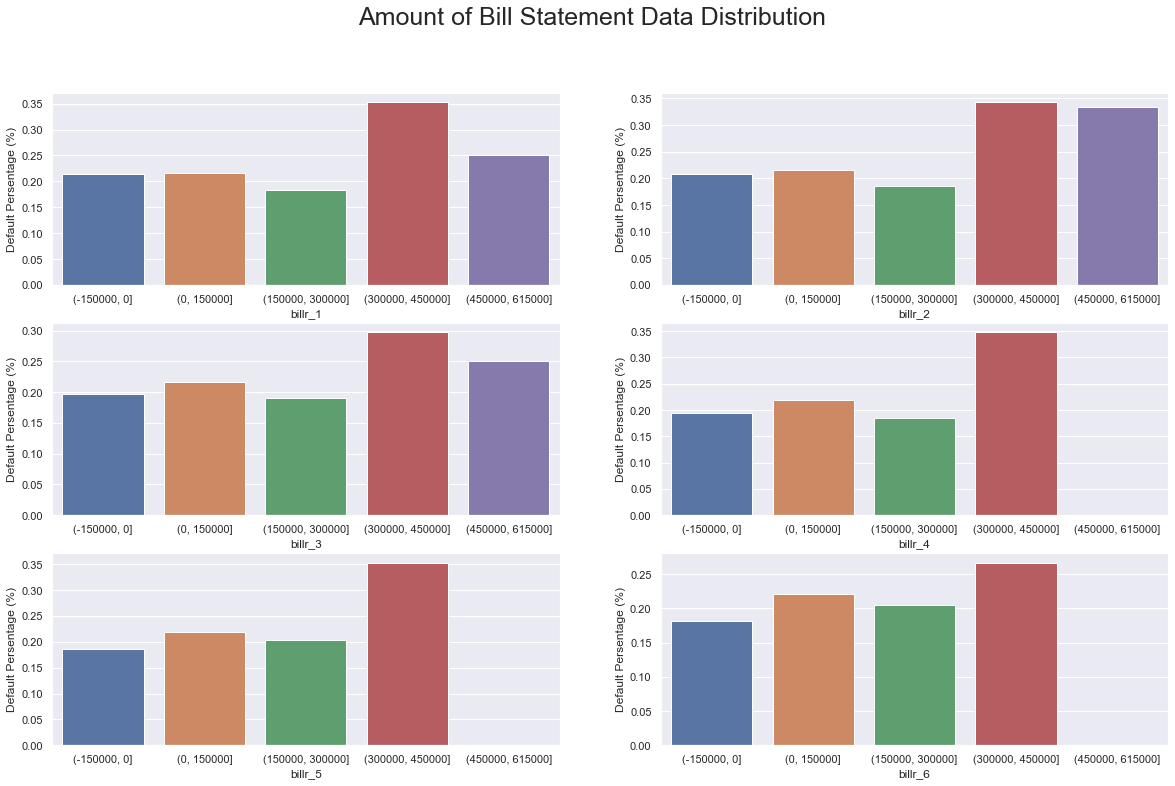

In [41]:
# Assigning amount of bill statement into new variable
# Setting figure size
plt.figure(figsize=(20,12))

for i, col in enumerate(billr_all):
    # Setting subplot    
    plt.subplot(3, 2, i+1)
    # Bar plotting
    sns.barplot(data=df_copy, x=col, y='default', ci=None)
    # Setting lables
    plt.ylabel('Default Persentage (%)')

# Setting plot title
plt.suptitle("Amount of Bill Statement Data Distribution", fontsize=25)

# Showing the plot
plt.show()

The billing statement is the amount of the bill that must be paid by the credit card used by the bank. In general, it can be seen that the number of bills each month does not change significantly and tends to be the same. However, in July a bill appeared between 450,000 and s.d. 615,000 USD means that in the middle of 2005 the use of credit cards increased in intensity so that the number of bills from users' shopping activities also increases.

**AMOUNT OF PREVIOUS PAYMENT**

In [42]:
# Making range of amount of previous payment
prep_all = ['prep_1', 'prep_2', 'prep_3', 'prep_4', 'prep_5', 'prep_6']
prepr_all = ['prepr_1', 'prepr_2', 'prepr_3', 'prepr_4', 'prepr_5', 'prepr_6']

for i, col in enumerate(prepr_all):
    # Defining range
    df_copy[col] = pd.cut(df_copy[prep_all[i]], [-1, 50000, 100000, 150000, 200000, 300000, 1250000])

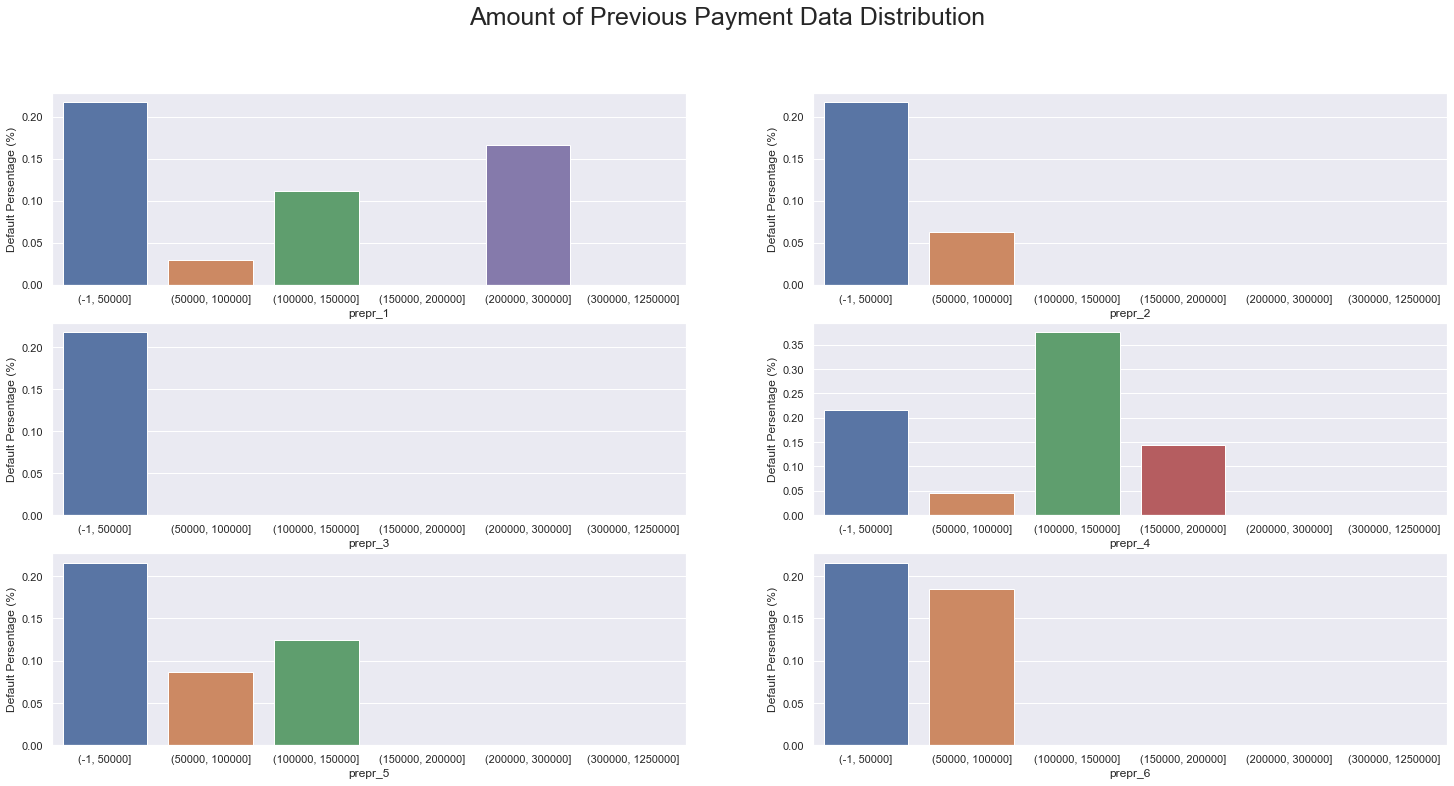

In [43]:
# Assigning amount of previous payment into new variable
# Setting figure size
plt.figure(figsize=(25,12))

for i, col in enumerate(prepr_all):
    # Setting subplot    
    plt.subplot(3, 2, i+1)
    # Bar plotting
    sns.barplot(data=df_copy, x=col, y='default', ci=None)
    # Setting lables
    plt.ylabel('Default Persentage (%)')

# Setting plot title
plt.suptitle("Amount of Previous Payment Data Distribution", fontsize=25)

# Showing the plot
plt.show()

Previous payment is the amount of payment made by the user based on the bill that the brand has. It can be seen that the nominal payment has increased from April to April. June 2005 (prepr_6, prepr_5, and prepr_4). Meanwhile, in July, August, and September 2005 (prepr_3, prepr_2, and prepr_1) there was no significant pattern depicted.

# **III. Data Preprocessing**

## **1. Inference Data Extraction**

In [44]:
# Slicing the first 10 rows for making the inference data
df_inf = df.sample(50, random_state = 19).reset_index()

# Showing the inference data
df_inf.head()

,index,limit,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_1,bill_2,bill_3,bill_4,bill_5,bill_6,prep_1,prep_2,prep_3,prep_4,prep_5,prep_6,default
0,1678,200000,2,1,2,40,2,2,0,0,0,2,185696,181236,185410,189069,197736,183299,0,8600,8300,13257,917,7000,1
1,1243,260000,2,2,1,30,0,0,0,0,0,0,66433,67134,67768,69033,70166,71377,2400,2496,2429,2599,2827,2050,0
2,651,50000,2,3,1,40,0,0,0,0,0,0,49941,51213,12104,12898,13687,14458,2400,1206,1000,1000,1000,1000,0
3,160,90000,2,3,2,26,0,0,0,0,0,0,91564,43201,42219,1769,2269,3269,3000,3000,1000,500,1000,86500,0
4,1212,40000,1,1,2,24,0,0,0,0,0,0,37412,38485,39575,39247,9687,33625,2000,20000,1359,600,33625,615,0


In [45]:
# Dropping index column from inference data
df_inf.drop(['index'], axis = 1, inplace = True)

In [46]:
# Dropping the inference data from the model data
df = df.drop(df_inf.index).reset_index()

In [47]:
# Dropping index column from dataFrame
df.drop(['index'], axis = 1, inplace = True)

In [48]:
# Show the data shape
df.shape

(2915, 24)

## **2. Training and Testing Data Separation**

In [49]:
# Split between `X` (Features) and `y` (Target)
X = df.drop('default', axis=1) 
y = df['default']
X

,limit,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_1,bill_2,bill_3,bill_4,bill_5,bill_6,prep_1,prep_2,prep_3,prep_4,prep_5,prep_6
0,90000,2,3,1,46,0,0,0,0,0,0,5965,6978,8152,9009,9359,9460,1120,1293,1150,500,400,400
1,90000,2,2,1,35,2,0,0,0,0,2,63426,57922,55010,52540,56236,40922,2700,2500,1900,4600,0,1600
2,200000,1,1,1,58,0,0,0,0,0,0,192461,195970,122214,124647,126921,129167,7822,4417,4446,4597,4677,4698
3,80000,2,1,2,22,0,0,0,0,0,0,78028,79347,76022,58897,54512,51937,3200,2229,1900,4000,5000,21000
4,230000,2,1,2,37,0,0,2,0,0,0,9092,12509,12784,12584,0,0,3500,700,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,210000,2,2,1,39,0,0,0,0,0,0,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664
2911,280000,2,1,1,41,2,0,0,0,0,0,280,6852,486,0,0,244,6859,486,0,0,244,0
2912,80000,1,1,2,28,1,0,0,0,0,0,0,47,207,0,0,0,47,207,0,0,0,0
2913,200000,1,2,1,53,1,0,0,0,0,0,0,2920,0,0,0,6753,2920,0,0,0,6753,0


In [50]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (2332, 23)
Test Size  :  (583, 23)


In [51]:
# Separating numerical and categorical columns
num_columns = X_train.select_dtypes(include = np.number).columns.to_list()
cat_columns = X_train.select_dtypes(include = ['object']).columns.to_list()

print('Numerical Columns:', num_columns)
print('Categorical Columns:', cat_columns)

Numerical Columns: ['limit', 'age', 'bill_1', 'bill_2', 'bill_3', 'bill_4', 'bill_5', 'bill_6', 'prep_1', 'prep_2', 'prep_3', 'prep_4', 'prep_5', 'prep_6']
Categorical Columns: ['sex', 'education', 'marriage', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


In [52]:
# Separating numerical and categorical columns in training and testing data
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

# Showing numerical data
X_train_num

,limit,age,bill_1,bill_2,bill_3,bill_4,bill_5,bill_6,prep_1,prep_2,prep_3,prep_4,prep_5,prep_6
216,170000,29,24717,26659,28592,29364,29096,29353,3000,3000,2000,1000,977,5000
1038,50000,32,42163,38252,27396,23584,17272,17634,1472,1500,1282,618,640,644
2454,130000,33,0,870,390,11,1011,381,870,300,11,1000,300,500
1552,80000,28,15268,5135,0,0,0,0,1315,0,0,0,0,0
670,80000,25,83931,82122,81028,81331,60614,63153,3500,3820,3220,4010,6700,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,80000,40,7111,12774,16817,15274,20043,13318,6500,5000,4025,8000,5000,2000
1378,140000,31,41314,42377,43923,43051,44109,43253,1732,2278,3000,1892,0,1572
757,30000,27,23134,23302,22844,22101,19535,19580,1712,1400,442,391,500,0
2670,160000,29,1778,0,0,150,150,989,0,0,150,150,989,0


In [53]:
# Showing categorical data
X_train_cat

,sex,education,marriage,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
216,2,1,2,0,0,0,0,0,0
1038,1,2,1,0,0,0,0,0,0
2454,1,2,2,1,0,0,0,0,0
1552,1,2,2,0,0,0,0,0,0
670,2,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
936,2,3,1,0,0,0,0,0,0
1378,2,1,2,0,0,0,2,2,2
757,2,2,1,0,0,0,0,0,0
2670,2,1,1,0,0,0,0,0,0


## **3. Feature Selection**

**NUMERICAL COLUMNS**

In [54]:
y_train_df = pd.DataFrame(y_train)

In [55]:
X_train_num = X_train[num_columns]

In [56]:
# Concate numerical columns and target column
corr_data = np.concatenate([X_train_num, y_train_df], axis=1)
corr_data_df = pd.DataFrame(corr_data)
corr_data_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,170000,29,24717,26659,28592,29364,29096,29353,3000,3000,2000,1000,977,5000,0
1,50000,32,42163,38252,27396,23584,17272,17634,1472,1500,1282,618,640,644,0
2,130000,33,0,870,390,11,1011,381,870,300,11,1000,300,500,0
3,80000,28,15268,5135,0,0,0,0,1315,0,0,0,0,0,0
4,80000,25,83931,82122,81028,81331,60614,63153,3500,3820,3220,4010,6700,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,80000,40,7111,12774,16817,15274,20043,13318,6500,5000,4025,8000,5000,2000,0
2328,140000,31,41314,42377,43923,43051,44109,43253,1732,2278,3000,1892,0,1572,0
2329,30000,27,23134,23302,22844,22101,19535,19580,1712,1400,442,391,500,0,0
2330,160000,29,1778,0,0,150,150,989,0,0,150,150,989,0,1


<AxesSubplot:>

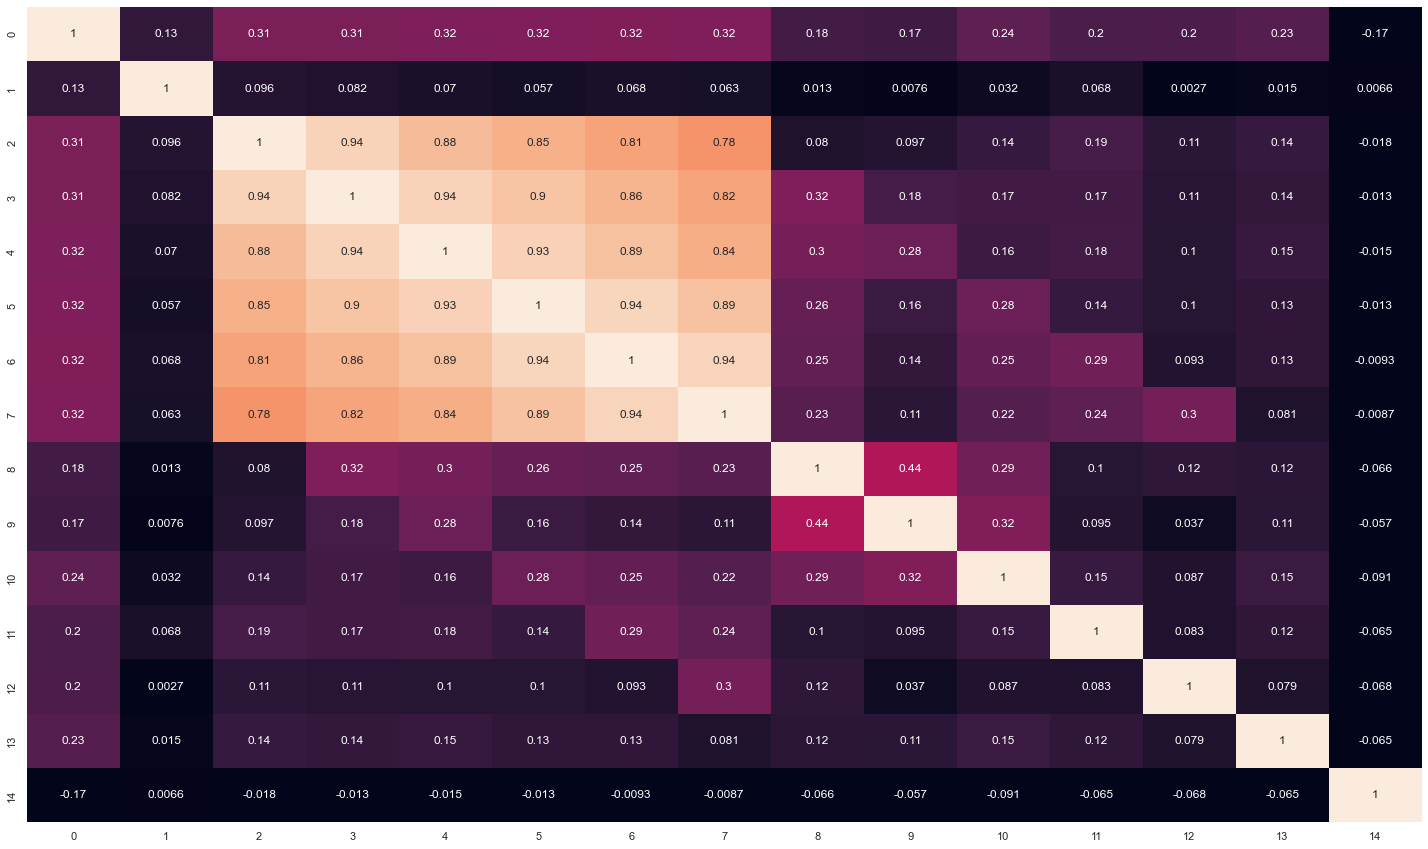

In [57]:
# Feature Correlation
# Setting figure size
fig = plt.figure(figsize = (25, 15))

# Heatmap plotting
sns.heatmap(corr_data_df.corr(),
            vmin = 0,
            vmax = 1,
            annot = True,
            cbar = False
)

Based on the results of the correlation carried out on numerical data, credit limit and age have a higher correlation value than other numerical features. So it was decided to eliminate the billing statement and previous payment features from the training data and only use credit limit and age data.

In [58]:
# Dropping unnessecary columns
X_train_num.drop(['bill_1', 'bill_2', 'bill_3', 'bill_4', 'bill_5', 'bill_6',
                  'prep_1', 'prep_2', 'prep_3', 'prep_4', 'prep_5', 'prep_6'], axis = 1, inplace = True)

In [59]:
# Dropping unnessecary columns
X_test_num.drop(['bill_1', 'bill_2', 'bill_3', 'bill_4', 'bill_5', 'bill_6',
                  'prep_1', 'prep_2', 'prep_3', 'prep_4', 'prep_5', 'prep_6'], axis = 1, inplace = True)

In [60]:
# Showing training numerical columns
X_train_num

,limit,age
216,170000,29
1038,50000,32
2454,130000,33
1552,80000,28
670,80000,25
...,...,...
936,80000,40
1378,140000,31
757,30000,27
2670,160000,29


**CATEGORICAL COLUMNS**

In [61]:
# Score function Chi2 tells the feature to be selected using Chi Square
# Defining chi square
test = SelectKBest(score_func=chi2, k=4)
# fitting shi square calculation
fit = test.fit(X_train_cat, y_train)
# Showing score
fit.scores_

array([1.60493249e-01, 8.63807507e-01, 1.77468719e-01, 6.97993857e+02,
       5.52274564e+02, 5.13997499e+02, 4.77391332e+02, 4.96650179e+02,
       4.32320121e+02])

In [62]:
# Rounding values
np.round_(fit.scores_)

array([  0.,   1.,   0., 698., 552., 514., 477., 497., 432.])

In [63]:
# Fitting score into categorical features
chi = pd.Series(fit.scores_)
chi.index = X_train_cat.columns
chi.sort_values(ascending=False)

pay_1        697.993857
pay_2        552.274564
pay_3        513.997499
pay_5        496.650179
pay_4        477.391332
pay_6        432.320121
education      0.863808
marriage       0.177469
sex            0.160493
dtype: float64

Based on the results of hypothesis testing using chi-square on the training data for the above categories, all category features have a relationship with the target data so that they will be used in the modeling process.

## **4. Outliers Handling**

In [64]:
# Function to create histogram and boxplot
def diagnostic_plots(X_train_num, variable):
    # Sets figure size
    plt.figure(figsize = (20, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_num[variable], bins = 30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y = X_train_num[variable])
    plt.title('Boxplot')

    plt.show()

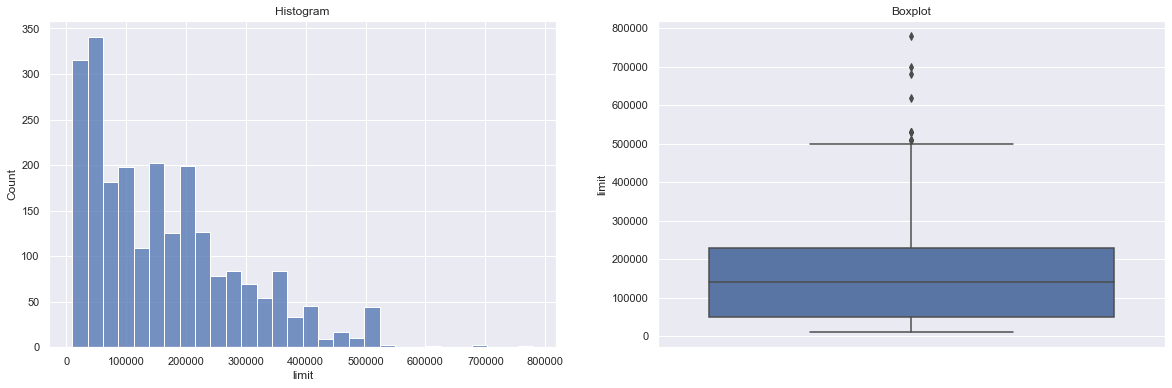


Skewness Value :  0.9557489272745874


In [65]:
# Limit balance data distribution
diagnostic_plots(X_train_num, 'limit')
print('\nSkewness Value : ', X_train_num['limit'].skew())

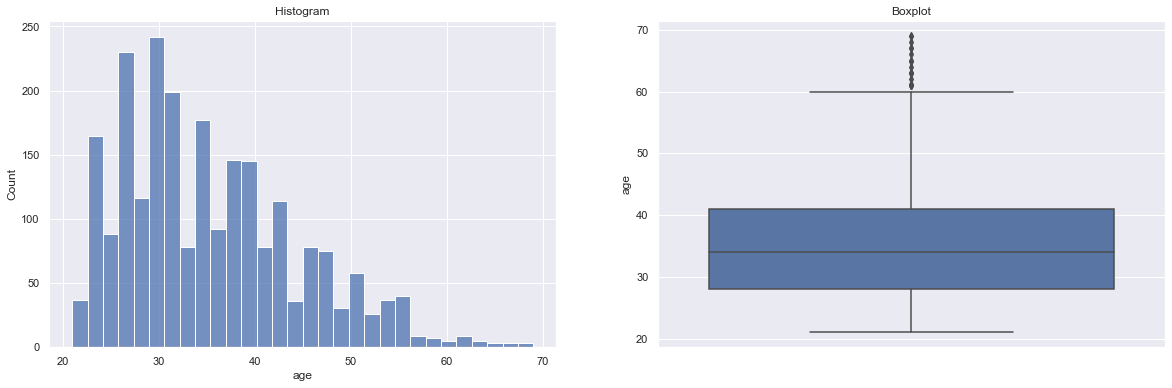


Skewness Value :  0.7740764318254468


In [66]:
# Age data distribution
diagnostic_plots(X_train_num, 'age')
print('\nSkewness Value : ', X_train_num['age'].skew())

The two numerical data that will be used to build the classification model have a moderate right skew with a skew value for the credit limit feature of 0.956 and a skew value of 0.774 for the age feature. It was decided that outliers handling would be carried out by censoring the data using windsorizer method. The selection of censoring is done because the amount of data used is very small so if the treatment given is the removal of outliers, it is feared that the data will decrease and affect the performance of the classification model later.

In [67]:
# Making iqr function
def find_skew_bound(data, feature, cons):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)

    lower_bound = data[feature].quantile(0.25) - (IQR * cons)
    upper_bound = data[feature].quantile(0.75) + (IQR * cons)

    return lower_bound, upper_bound

In [68]:
# Finding credit limit outliers

lower_bound, upper_bound = find_skew_bound(X_train_num, 'limit', 1.5)
lower_bound, upper_bound

print('The low boudaries of credit limit feature :',lower_bound)
print('The high boundaries of credit limit feature :',upper_bound)

The low boudaries of credit limit feature : -220000.0
The high boundaries of credit limit feature : 500000.0


In [69]:
# Finding age outliers

lower_bound, upper_bound = find_skew_bound(X_train_num, 'age', 1.5)
lower_bound, upper_bound

print('The low boudaries of credit limit feature :',lower_bound)
print('The high boundaries of credit limit feature :',upper_bound)

The low boudaries of credit limit feature : 8.5
The high boundaries of credit limit feature : 60.5


In [70]:
# Create the capper
windsor = Winsorizer(capping_method='iqr',
                          tail='right',
                          fold=1.5,
                          variables=['limit', 'age'])

# Fitting the data to be capped
windsor.fit(X_train_num)

# Data transformation
X_train_num_t = windsor.transform(X_train_num)

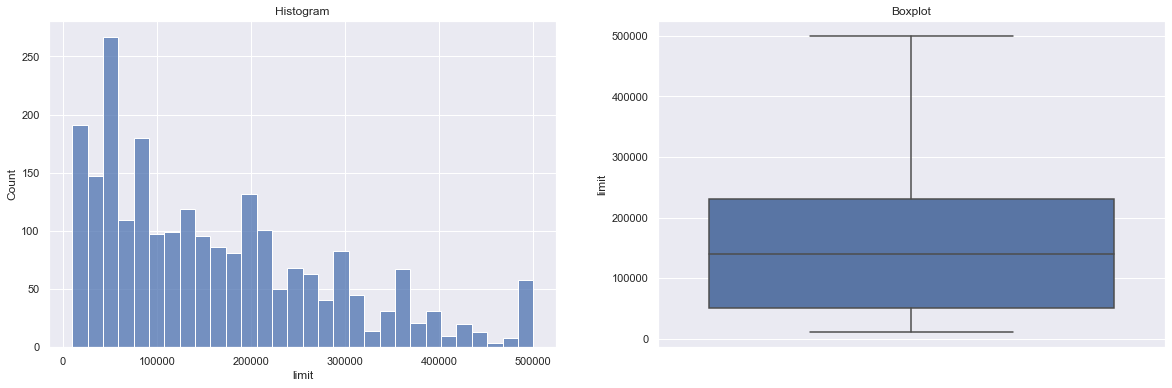


Skewness Value :  0.8771986731543383


In [71]:
# Limit balance data distribution
diagnostic_plots(X_train_num_t, 'limit')
print('\nSkewness Value : ', X_train_num_t['limit'].skew())

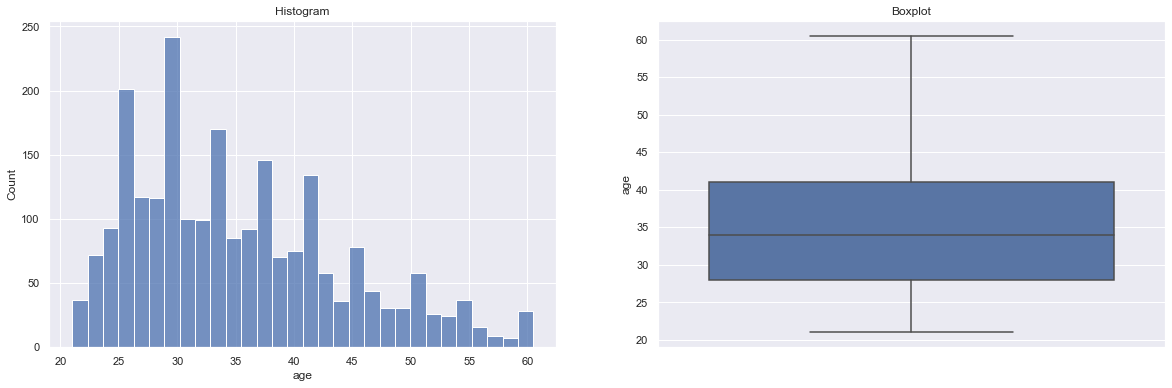


Skewness Value :  0.7055846730906483


In [72]:
# Age data distribution
diagnostic_plots(X_train_num_t, 'age')
print('\nSkewness Value : ', X_train_num_t['age'].skew())

In [73]:
# Showing statistical train data before caping
print('X_train - Before Capping')
print(X_train_num.describe())

print('')

# Showing statistical train data after caping
print('X_train - After Capping')
print(X_train_num_t.describe())

X_train - Before Capping
               limit          age
count    2332.000000  2332.000000
mean   163001.715266    35.270154
std    123920.630265     9.090040
min     10000.000000    21.000000
25%     50000.000000    28.000000
50%    140000.000000    34.000000
75%    230000.000000    41.000000
max    780000.000000    69.000000

X_train - After Capping
               limit          age
count    2332.000000  2332.000000
mean   162615.780446    35.237779
std    122571.552115     8.989672
min     10000.000000    21.000000
25%     50000.000000    28.000000
50%    140000.000000    34.000000
75%    230000.000000    41.000000
max    500000.000000    60.500000


## **5. Missing Values Handling**

In [74]:
# Identifying possible null value in X_train
X_train.isnull().sum()

limit        0
sex          0
education    0
marriage     0
age          0
pay_1        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_1       0
bill_2       0
bill_3       0
bill_4       0
bill_5       0
bill_6       0
prep_1       0
prep_2       0
prep_3       0
prep_4       0
prep_5       0
prep_6       0
dtype: int64

There are no missing values for bank credit card user data.

## **6. Feature Scaling**

In [75]:
# Feature Scaling using MinMaxScaler
# Defining scaler function
scaler = MinMaxScaler()
# Fitting the data to be scaled
scaler.fit(X_train_num_t)

# Data transformation
X_train_num_scaled = scaler.transform(X_train_num_t)
X_test_num_scaled = scaler.transform(X_test_num)

# Showing scaled data
X_train_num_scaled

array([[0.32653061, 0.20253165],
       [0.08163265, 0.27848101],
       [0.24489796, 0.30379747],
       ...,
       [0.04081633, 0.15189873],
       [0.30612245, 0.20253165],
       [0.20408163, 0.43037975]])

## **7. Feature Merging**

In [76]:
# Data numeric and categorical concatenating
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)

X_train_final

array([[0.32653061224489793, 0.20253164556962033, '2', ..., '0', '0',
        '0'],
       [0.08163265306122448, 0.2784810126582279, '1', ..., '0', '0', '0'],
       [0.24489795918367344, 0.30379746835443044, '1', ..., '0', '0',
        '0'],
       ...,
       [0.04081632653061225, 0.15189873417721522, '2', ..., '0', '0',
        '0'],
       [0.3061224489795918, 0.20253164556962033, '2', ..., '0', '0', '0'],
       [0.2040816326530612, 0.4303797468354431, '2', ..., '0', '0', '2']],
      dtype=object)

In [77]:
# Assigning into dataFrame
X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.326531,0.202532,2,1,2,0,0,0,0,0,0
1,0.081633,0.278481,1,2,1,0,0,0,0,0,0
2,0.244898,0.303797,1,2,2,1,0,0,0,0,0
3,0.142857,0.177215,1,2,2,0,0,0,0,0,0
4,0.142857,0.101266,2,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2327,0.142857,0.481013,2,3,1,0,0,0,0,0,0
2328,0.265306,0.253165,2,1,2,0,0,0,2,2,2
2329,0.040816,0.151899,2,2,1,0,0,0,0,0,0
2330,0.306122,0.202532,2,1,1,0,0,0,0,0,0


In [78]:
# Showing target training data
y_train

216     0
1038    0
2454    0
1552    0
670     0
       ..
936     0
1378    0
757     0
2670    1
1629    1
Name: default, Length: 2332, dtype: int64

# **IV. LOGISTIC REGRESSION**

## **1. Model Definition**

In [79]:
# Logistic Regression
log = LogisticRegression()

## **2. Model Training**

In [80]:
# Train the model
log.fit(X_train_final,y_train)

LogisticRegression()

## **3. Model Evaluation**

**MODEL PREDICTION**

In [81]:
# Predict Train-Set and Test-Set 
y_pred_train_log = log.predict(X_train_final)
y_pred_test_log = log.predict(X_test_final)

**CROSS-VALIDATION**

In [138]:
# Cross Validation
skfold = StratifiedKFold(n_splits=10)
log_train_scores = cross_val_score(log, X_train_final, y_train, cv = skfold, scoring = "accuracy")
log_test_scores = cross_val_score(log, X_test_final, y_test, cv = skfold, scoring = "accuracy")

print(f'Train Mean Accuracy:','{:.3f}'.format(np.mean(log_train_scores)), '| Train Std Accuracy:','{:.3f}'.format(np.std(log_train_scores)))
print(f'Test Mean Accuracy:','{:.3f}'.format(np.mean(log_test_scores)), ' | Test Std Accuracy:','{:.3f}'.format(np.std(log_test_scores)))

Train Mean Accuracy: 0.828 | Train Std Accuracy: 0.017
Test Mean Accuracy: 0.842  | Test Std Accuracy: 0.033


**MODEL ACCURACY**

In [139]:
# Classification report
print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_log, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_log, zero_division=0))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1817
           1       0.72      0.38      0.50       515

    accuracy                           0.83      2332
   macro avg       0.78      0.67      0.70      2332
weighted avg       0.82      0.83      0.81      2332



========== TEST ==========
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       470
           1       0.74      0.43      0.55       113

    accuracy                           0.86       583
   macro avg       0.81      0.70      0.73       583
weighted avg       0.85      0.86      0.85       583



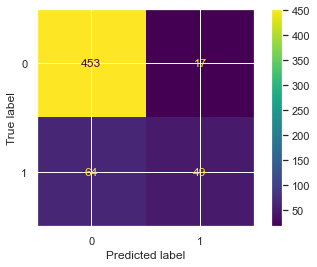

In [84]:
# Confussion matrix
cm = confusion_matrix(y_test, y_pred_test_log, labels = log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = log.classes_)

disp.plot()
plt.show()

The use of cross-validation is done to see the consistency of the model made. The input data used to create the model is unbalanced data so the value used in the cross-validation is the recall value. The average recall value in the training model is 0.37 while the test model is 0.33. This value is a very low value. Because the model will have better performance if the recall value is closer to 1.0. This of course cannot be separated from the influence of the imbalance of the target data used. When viewed in the matrix evaluation report, it can be seen that the accuracy value of the training model gets a value of 0.83 while the testing model gets a value of 0.86. In general, the accuracy value obtained is quite good. However, considering that the input data used is unbalanced data, this accuracy value is considered biased. So it cannot be used as a consideration for the performance of the model made. When viewed in the confusion matrix, there are 453 data that do not default credit card user data identified according to their original condition. Then there are 64 non-default credit card user data identified as default users. Then there are 49 default credit card user data that were identified according to their original condition, while the other 17 default data were misclassified and identified as not default data.

# **V. SUPPORT VECTOR MACHINE (SVM)**

## **1. Model Definition**

In [85]:
# SVM model
svm = SVC(random_state = 19)

## **2. Model Training**

In [86]:
# Train the model
svm.fit(X_train_final, y_train)

SVC(random_state=19)

## **3. Model Evaluation**

**MODEL PREDICTION**

In [87]:
# Predict Train-Set and Test-Set 
y_pred_train_svm = svm.predict(X_train_final)
y_pred_test_svm = svm.predict(X_test_final)

**CROSS-VALIDATION**

In [140]:
# Cross Validation
skfold = StratifiedKFold(n_splits=10)
svm_train_scores = cross_val_score(svm, X_train_final, y_train, cv = skfold, scoring = "accuracy")
svm_test_scores = cross_val_score(svm, X_test_final, y_test, cv = skfold, scoring = "accuracy")

print(f'Train Mean Accuracy:','{:.3f}'.format(np.mean(svm_train_scores)), '| Train Std Accuracy:','{:.3f}'.format(np.std(svm_train_scores)))
print(f'Test Mean Accuracy:','{:.3f}'.format(np.mean(svm_test_scores)), ' | Test Std Accuracy:','{:.3f}'.format(np.std(svm_test_scores)))

Train Mean Accuracy: 0.829 | Train Std Accuracy: 0.013
Test Mean Accuracy: 0.832  | Test Std Accuracy: 0.052


**MODEL ACCURACY**

In [141]:
# Classification report
print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_svm, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_svm, zero_division=0))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1817
           1       0.73      0.44      0.55       515

    accuracy                           0.84      2332
   macro avg       0.79      0.70      0.73      2332
weighted avg       0.83      0.84      0.83      2332



========== TEST ==========
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       470
           1       0.70      0.49      0.57       113

    accuracy                           0.86       583
   macro avg       0.79      0.72      0.74       583
weighted avg       0.85      0.86      0.85       583



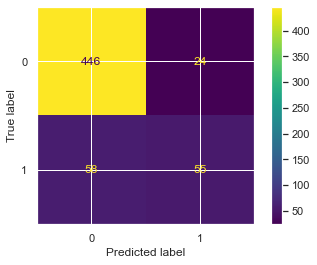

In [90]:
# Confussion matrix
cm = confusion_matrix(y_test, y_pred_test_svm, labels = svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svm.classes_)

disp.plot()
plt.show()

The average recall value in the training model is 0.43 while the test model is 0.28. This value is a very low value. Because the model will have better performance if the recall value is closer to 1.0. This of course cannot be separated from the influence of the imbalance of the target data used. When viewed in the matrix evaluation report, it can be seen that the accuracy value of the training model gets a value of 0.84 while the testing model gets a value of 0.86. In general, the accuracy value obtained is quite good. However, considering that the input data used is unbalanced data, this accuracy value is considered biased. So it cannot be used as a consideration for the performance of the model made. When viewed in the confusion matrix, there are 446 data that do not default credit card user data identified according to their original condition. Then there are 58 non-default credit card user data identified as default users. Then there are 55 default credit card user data that were identified according to their original condition, while the other 24 default data were misclassified and identified as not default data.

# **VI. DECISION TREE**

## **1. Model Definition**

In [91]:
# Decision tree model
dt = DecisionTreeClassifier(random_state=19)

# **2. Model Training**

In [92]:
# Train the model
dt.fit(X_train_final, y_train)

DecisionTreeClassifier(random_state=19)

## **3. Model Evaluation**

**MODEL PREDICTION**

In [93]:
# Predict Train-Set and Test-Set 
y_pred_train_dt = dt.predict(X_train_final)
y_pred_test_dt = dt.predict(X_test_final)

**CROSS-VALIDATION**

In [142]:
# Cross Validation
skfold = StratifiedKFold(n_splits=10)
dt_train_scores = cross_val_score(dt, X_train_final, y_train, cv = skfold, scoring = "accuracy")
dt_test_scores = cross_val_score(dt, X_test_final, y_test, cv = skfold, scoring = "accuracy")

print(f'Train Mean Accuracy:','{:.3f}'.format(np.mean(dt_train_scores)), '| Train Std Accuracy:','{:.3f}'.format(np.std(dt_train_scores)))
print(f'Test Mean Accuracy:','{:.3f}'.format(np.mean(dt_test_scores)), ' | Test Std Accuracy:','{:.3f}'.format(np.std(dt_test_scores)))

Train Mean Accuracy: 0.725 | Train Std Accuracy: 0.025
Test Mean Accuracy: 0.753  | Test Std Accuracy: 0.035


**MODEL ACCURACY**

In [143]:
# Classification report
print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_dt, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_dt, zero_division=0))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1817
           1       1.00      0.91      0.95       515

    accuracy                           0.98      2332
   macro avg       0.99      0.95      0.97      2332
weighted avg       0.98      0.98      0.98      2332



========== TEST ==========
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       470
           1       0.42      0.47      0.45       113

    accuracy                           0.77       583
   macro avg       0.65      0.66      0.65       583
weighted avg       0.78      0.77      0.78       583



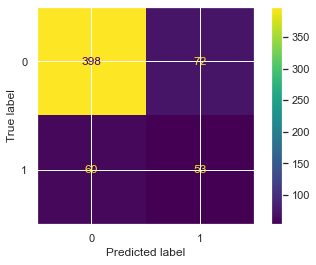

In [96]:
# Confussion matrix
cm = confusion_matrix(y_test, y_pred_test_dt, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)

disp.plot()
plt.show()

The average recall value in the training model is 0.40 while the test model is 0.43. This value is a very low value. Because the model will have better performance if the recall value is closer to 1.0. This of course cannot be separated from the influence of the imbalance of the target data used. When viewed in the matrix evaluation report, it can be seen that the accuracy value of the training model gets a value of 0.98 while the testing model gets a value of 0.77. This value indicates that the model created is overfitting the training model, but cannot generalize the testing data being tested so the testing model gets a low score and is very unequal to the training model. When viewed in the confusion matrix, there are 398 data that do not default credit card user data identified according to their original condition. Then there are 60 non-default credit card user data identified as default users. Then there are 53 default credit card user data that were identified according to their original condition, while the other 72 default data were misclassified and identified as not default data. The misclassification that occurs in the default data is very high in number so the accuracy of the testing model is low.

# **VII. RANDOM FORESTS**

## **1. Model Definition**

In [97]:
# Random forests model
rf = RandomForestClassifier(random_state=19)

## **2. Model Training**

In [98]:
# Model training
rf.fit(X_train_final, y_train)

RandomForestClassifier(random_state=19)

## **3. Model Evaluation**

**MODEL PREDICTION**

In [99]:
# Predict Train-Set and Test-Set 
y_pred_train_rf = rf.predict(X_train_final)
y_pred_test_rf = rf.predict(X_test_final)

**CROSS-VALIDATION**

In [145]:
# Cross Validation
skfold = StratifiedKFold(n_splits=10)
rf_train_scores = cross_val_score(rf, X_train_final, y_train, cv = skfold, scoring = "accuracy")
rf_test_scores = cross_val_score(rf, X_test_final, y_test, cv = skfold, scoring = "accuracy")

print(f'Train Mean Accuracy:','{:.3f}'.format(np.mean(rf_train_scores)), '| Train Std Accuracy:','{:.3f}'.format(np.std(rf_train_scores)))
print(f'Test Mean Accuracy:','{:.3f}'.format(np.mean(rf_test_scores)), ' | Test Std Accuracy:','{:.3f}'.format(np.std(rf_test_scores)))

Train Mean Accuracy: 0.802 | Train Std Accuracy: 0.018
Test Mean Accuracy: 0.839  | Test Std Accuracy: 0.037


**MODEL ACCURACY**

In [144]:
# Classification report
print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_rf, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_rf, zero_division=0))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1817
           1       0.97      0.93      0.95       515

    accuracy                           0.98      2332
   macro avg       0.98      0.96      0.97      2332
weighted avg       0.98      0.98      0.98      2332



========== TEST ==========
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       470
           1       0.59      0.46      0.52       113

    accuracy                           0.83       583
   macro avg       0.73      0.69      0.71       583
weighted avg       0.82      0.83      0.83       583



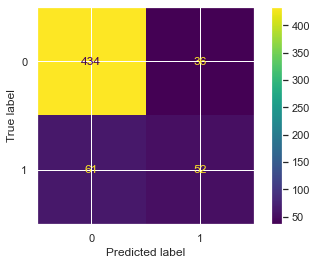

In [102]:
# Confussion matrix
cm = confusion_matrix(y_test, y_pred_test_rf, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf.classes_)

disp.plot()
plt.show()

The average recall value in the training model is 0.40 while the test model is 0.43. This value is a very low value. Because the model will have better performance if the recall value is closer to 1.0. This of course cannot be separated from the influence of the imbalance of the target data used. When viewed in the matrix evaluation report, it can be seen that the accuracy value of the training model gets a value of 0.98 while the testing model gets a value of 0.83. This value indicates that the model created is overfitting the training model, but cannot generalize the testing data being tested so the testing model gets a low score and is very unequal to the training model. The overfitting that occurs in the random forests model is not as bad as the decision tree model because the random forest model which is a tree-based model has a better decision-making method because the number of branches formed is much more than the decision tree. When viewed in the confusion matrix, there are 434 data that do not default credit card user data identified according to their original condition. Then there are 61 non-default credit card user data identified as default users. Then there are 52 default credit card user data that were identified according to their original condition, while the other 36 default data were misclassified and identified as not default data.

# **VIII. K-NEAREST NEIGHBORS (KNN)**

## **1. Model Definition**

In [103]:
# Knn model
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'auto')

## **2. Model Training**

In [104]:
# Train the model
knn.fit(X_train_final, y_train)

KNeighborsClassifier()

## **3. Model Evaluation**

**MODEL PREDICTION**

In [105]:
# Predict Train-Set and Test-Set 
y_pred_train_knn = knn.predict(X_train_final)
y_pred_test_knn = knn.predict(X_test_final)

**CROSS-VALIDATION**

In [146]:
# Cross Validation
skfold = StratifiedKFold(n_splits=10)
knn_train_scores = cross_val_score(knn, X_train_final, y_train, cv = skfold, scoring = "accuracy")
knn_test_scores = cross_val_score(knn, X_test_final, y_test, cv = skfold, scoring = "accuracy")

print(f'Train Mean Accuracy:','{:.3f}'.format(np.mean(knn_train_scores)), '| Train Std Accuracy:','{:.3f}'.format(np.std(knn_train_scores)))
print(f'Test Mean Accuracy:','{:.3f}'.format(np.mean(knn_test_scores)), ' | Test Std Accuracy:','{:.3f}'.format(np.std(knn_test_scores)))

Train Mean Accuracy: 0.806 | Train Std Accuracy: 0.018
Test Mean Accuracy: 0.844  | Test Std Accuracy: 0.036


**MODEL ACCURACY**

In [147]:
# Classification report
print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_knn, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_knn, zero_division=0))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1817
           1       0.75      0.50      0.60       515

    accuracy                           0.85      2332
   macro avg       0.81      0.73      0.76      2332
weighted avg       0.84      0.85      0.84      2332



========== TEST ==========
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       470
           1       0.60      0.47      0.53       113

    accuracy                           0.84       583
   macro avg       0.74      0.70      0.71       583
weighted avg       0.83      0.84      0.83       583



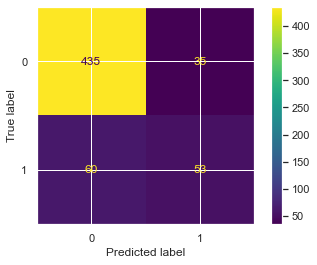

In [108]:
# Confussion matrix
cm = confusion_matrix(y_test, y_pred_test_knn, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)

disp.plot()
plt.show()

The average recall value in the training model is 0.38 while the test model is 0.40. This value is a very low value. Because the model will have better performance if the recall value is closer to 1.0. This of course cannot be separated from the influence of the imbalance of the target data used. When viewed in the matrix evaluation report, it can be seen that the accuracy value of the training model gets a value of 0.85 while the testing model gets a value of 0.84. In general, the accuracy value obtained is quite good. However, considering that the input data used is unbalanced data, this accuracy value is considered biased. So it cannot be used as a consideration for the performance of the model made. When viewed in the confusion matrix, there are 435 data that do not default credit card user data identified according to their original condition. Then there are 60 non-default credit card user data identified as default users. Then there are 53 default credit card user data that were identified according to their original condition, while the other 35 default data were misclassified and identified as not default data.

# **IX. NAIVE BAYES**

## **1. Model Definition**

In [109]:
# Naive bayes model
nb = GaussianNB()

## **2. Model Training**

In [110]:
# Train the model
nb.fit(X_train_final, y_train)

GaussianNB()

## **3. Model Evaluation**

**MODEL PREDICTION**

In [111]:
# Predict Train-Set and Test-Set 
y_pred_train_nb = nb.predict(X_train_final)
y_pred_test_nb = nb.predict(X_test_final)

**CROSS-VALIDATION**

In [149]:
# Cross Validation
skfold = StratifiedKFold(n_splits=10)
nb_train_scores = cross_val_score(nb, X_train_final, y_train, cv = skfold, scoring = "accuracy")
nb_test_scores = cross_val_score(nb, X_test_final, y_test, cv = skfold, scoring = "accuracy")

print(f'Train Mean Accuracy:','{:.3f}'.format(np.mean(nb_train_scores)), '| Train Std Accuracy:','{:.3f}'.format(np.std(nb_train_scores)))
print(f'Test Mean Accuracy:','{:.3f}'.format(np.mean(nb_test_scores)), ' | Test Std Accuracy:','{:.3f}'.format(np.std(nb_test_scores)))

Train Mean Accuracy: 0.807 | Train Std Accuracy: 0.017
Test Mean Accuracy: 0.820  | Test Std Accuracy: 0.055


**MODEL ACCURACY**

In [148]:
# Classification report
print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_nb, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_nb, zero_division=0))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1817
           1       0.59      0.44      0.51       515

    accuracy                           0.81      2332
   macro avg       0.72      0.68      0.69      2332
weighted avg       0.79      0.81      0.80      2332



========== TEST ==========
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       470
           1       0.53      0.51      0.52       113

    accuracy                           0.82       583
   macro avg       0.71      0.70      0.70       583
weighted avg       0.81      0.82      0.82       583



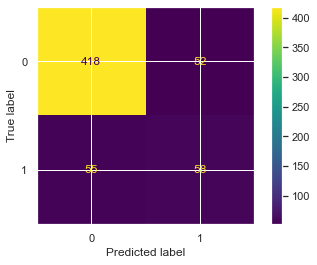

In [114]:
# Confussion matrix
cm = confusion_matrix(y_test, y_pred_test_nb, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = nb.classes_)

disp.plot()
plt.show()

The average recall value in the training model is 0.45 while the test model is 0.52. This value is a very low value. Because the model will have better performance if the recall value is closer to 1.0. This of course cannot be separated from the influence of the imbalance of the target data used. When viewed in the matrix evaluation report, it can be seen that the accuracy value of the training model gets a value of 0.81 while the testing model gets a value of 0.82. In general, the accuracy value obtained is quite good. However, considering that the input data used is unbalanced data, this accuracy value is considered biased. So it cannot be used as a consideration for the performance of the model made. When viewed in the confusion matrix, there are 418 data that do not default credit card user data identified according to their original condition. Then there are 55 non-default credit card user data identified as default users. Then there are 58 default credit card user data that were identified according to their original condition, while the other 52 default data were misclassified and identified as not default data.

# **X. GRADIENT BOOSTING**

## **1. Model Definition**

In [115]:
# Adaboost for decision tree model
gb = GradientBoostingClassifier(loss = 'log_loss', learning_rate = 0.01, n_estimators = 200, random_state = 19)

## **2. Model Training**

In [116]:
# Train the model
gb.fit(X_train_final, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200,
                           random_state=19)

## **3. Model Evaluation**

**MODEL PREDICTION**

In [117]:
# Predict Train-Set and Test-Set 
y_pred_train_gb = gb.predict(X_train_final)
y_pred_test_gb = gb.predict(X_test_final)

**CROSS-VALIDATION**

In [150]:
# Cross Validation
skfold = StratifiedKFold(n_splits=10)
gb_train_scores = cross_val_score(gb, X_train_final, y_train, cv = skfold, scoring = "accuracy")
gb_test_scores = cross_val_score(gb, X_test_final, y_test, cv = skfold, scoring = "accuracy")

print(f'Train Mean Accuracy:','{:.3f}'.format(np.mean(gb_train_scores)), '| Train Std Accuracy:','{:.3f}'.format(np.std(gb_train_scores)))
print(f'Test Mean Accuracy:','{:.3f}'.format(np.mean(gb_test_scores)), ' | Test Std Accuracy:','{:.3f}'.format(np.std(gb_test_scores)))

Train Mean Accuracy: 0.826 | Train Std Accuracy: 0.017
Test Mean Accuracy: 0.856  | Test Std Accuracy: 0.028


**MODEL ACCURACY**

In [151]:
# Classification report
print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_gb, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_gb, zero_division=0))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1817
           1       0.75      0.39      0.51       515

    accuracy                           0.84      2332
   macro avg       0.80      0.68      0.71      2332
weighted avg       0.83      0.84      0.82      2332



========== TEST ==========
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       470
           1       0.73      0.45      0.56       113

    accuracy                           0.86       583
   macro avg       0.80      0.71      0.74       583
weighted avg       0.85      0.86      0.85       583



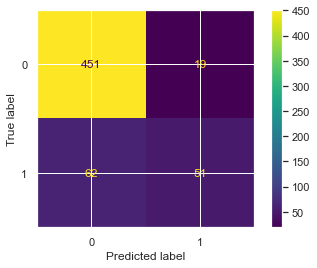

In [120]:
# Confussion matrix
cm = confusion_matrix(y_test, y_pred_test_gb, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gb.classes_)

disp.plot()
plt.show()

The average recall value in the training model is 0.38 while the test model is 0.42. This value is a very low value. Because the model will have better performance if the recall value is closer to 1.0. This of course cannot be separated from the influence of the imbalance of the target data used. When viewed in the matrix evaluation report, it can be seen that the accuracy value of the training model gets a value of 0.84 while the testing model gets a value of 0.86. In general, the accuracy value obtained is quite good. However, considering that the input data used is unbalanced data, this accuracy value is considered biased. So it cannot be used as a consideration for the performance of the model made. When viewed in the confusion matrix, there are 451 data that do not default credit card user data identified according to their original condition. Then there are 62 non-default credit card user data identified as default users. Then there are 51 default credit card user data that were identified according to their original condition, while the other 19 default data were misclassified and identified as not default data.

# **XI. SUMMARIES**

## **1. Training Model**

| Metric            |  Logistic Regression  |   Support Vector Machine  |   Decision Tree   |   Random Forests  |   KNN   |   NAIVE BAYES   |   GRADIENT BOOSTING   |
| :---              |        :----:         |           :---:           |       :---:       |       :---:       |  :---:  |      :---:      |          :---:        |
| Accuracy Score    | 0.83                  | 0.84                      | 0.98              | 0.98              | 0.85    | 0.81            | 0.84                  |
| Recall CV         | 0.37                  | 0.43                      | 0.40              | 0.40              | 0.38    | 0.45            | 0.38                  |

## **2. Testing Model**

| Metric            |  Logistic Regression  |   Support Vector Machine  |   Decision Tree   |   Random Forests  |   KNN   |   NAIVE BAYES   |   GRADIENT BOOSTING   |
| :---              |        :----:         |           :---:           |       :---:       |       :---:       |  :---:  |      :---:      |          :---:        |
| Accuracy Score    | 0.86                  | 0.86                      | 0.77              | 0.83              | 0.84    | 0.82            | 0.86                  |
| Recall CV         | 0.33                  | 0.28                      | 0.43              | 0.43              | 0.40    | 0.52            | 0.42                  |

As discussed earlier, the performance of the machine learning classification model, in general, can be seen from the results of the accuracy scores of the training model and the testing model. However, there is a condition where the two values ​​are biased. This condition is a condition where the target data used is data that is not balanced between data labels. Cross-validation has been carried out using the recall scores of each model to see its consistency. This recall value will be considered to represent the model's performance in identifying labels that match ground truth or positive true. The recall value is considered to be getting better as it approaches 1.0. Determination of the best model carried out in this modeling using imbalanced data is done by comparing the best recall values ​​between models. The Naive Bayes model has the best recall score among all models with a recall value of 0.45 on the training model and 0.52 on the testing model. Then after determining the model with the best performance, the modeling will be carried out again, but by using hyperparameter tuning to improve the performance of the model. The hyperparameter tuning method used this time is grid search hyperparameter tuning. The selection of this method is based on the number of features used. If the number of features used is quite large, then grid search is a more reliable method to use.

# **XII. HYPERPARAMETER TUNING FOR THE BEST MODEL**

## **1. GRID SEARCH**

In [121]:
# Setting grid parameters
param_grid = {'var_smoothing': np.logspace(0,-9, num = 100)}

# Showing grid parameter
param_grid

{'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
        4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
        1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
        8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
        3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
        1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
        6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
        2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
        1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
        5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
        2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
        1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
        4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
        1.87381742e-05, 1.51991108e-05, 1.23284

In [122]:
# Defining grid search
nb_gridcv = GridSearchCV(estimator = GaussianNB(),
                      param_grid = param_grid,
                      cv = 10,
                      verbose = 1,
                      n_jobs = -1
)

In [123]:
# Fitting grid search
nb_gridcv.fit(X_train_final, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [124]:
# Get Best Hyperparameters
nb_gridcv.best_params_

{'var_smoothing': 0.8111308307896871}

In [125]:
# Get Best Estimator
nb_gridcv_best = nb_gridcv.best_estimator_

In [126]:
# Check Performance Model against Test-Set
y_pred_test_nb_gridcv = nb_gridcv_best.predict(X_test_final)

In [127]:
# Classification report
print(classification_report(y_test, y_pred_test_nb_gridcv))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       470
           1       0.62      0.40      0.48       113

    accuracy                           0.84       583
   macro avg       0.74      0.67      0.69       583
weighted avg       0.82      0.84      0.82       583



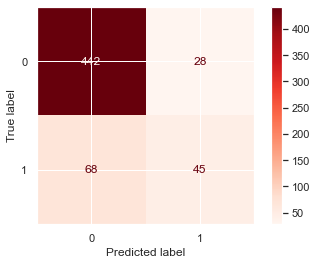

In [128]:
# Confussion matrix
print(ConfusionMatrixDisplay.from_estimator(nb_gridcv_best, X_test_final, y_test, cmap='Reds'))

The tuning hyperparameter in the Naive Bayes model can be applied to the var_smoothing parameter. var_smoothing is a portion of the largest variance of all features that are added to variances for stability calculation. After tuning the accuracy value based on cross-validation, it gets a value of 0.84. In general, the performance of the model is slightly improved. When viewed in the confusion matrix, there are 442 data that do not default credit card user data identified according to their original condition. Then there are 68 non-default credit card user data identified as default users. Then there are 45 default credit card user data that were identified according to their original condition, while the other 28 default data were misclassified and identified as not default data. In general, misclassification of models that have been hyperparameter tuned has decreased.

# **XIII. MODEL INFERENCE**

In [129]:
# Showing data inference
df_inf.head()

,limit,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_1,bill_2,bill_3,bill_4,bill_5,bill_6,prep_1,prep_2,prep_3,prep_4,prep_5,prep_6,default
0,200000,2,1,2,40,2,2,0,0,0,2,185696,181236,185410,189069,197736,183299,0,8600,8300,13257,917,7000,1
1,260000,2,2,1,30,0,0,0,0,0,0,66433,67134,67768,69033,70166,71377,2400,2496,2429,2599,2827,2050,0
2,50000,2,3,1,40,0,0,0,0,0,0,49941,51213,12104,12898,13687,14458,2400,1206,1000,1000,1000,1000,0
3,90000,2,3,2,26,0,0,0,0,0,0,91564,43201,42219,1769,2269,3269,3000,3000,1000,500,1000,86500,0
4,40000,1,1,2,24,0,0,0,0,0,0,37412,38485,39575,39247,9687,33625,2000,20000,1359,600,33625,615,0


In [130]:
# Dropping unnessecary data
df_inf.drop(['default', 'bill_1', 'bill_2', 'bill_3', 'bill_4', 'bill_5', 'bill_6',
             'prep_1', 'prep_2', 'prep_3', 'prep_4', 'prep_5', 'prep_6'
], axis = 1, inplace = True)

In [131]:
# Showing data inference
df_inf.head()

,limit,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,200000,2,1,2,40,2,2,0,0,0,2
1,260000,2,2,1,30,0,0,0,0,0,0
2,50000,2,3,1,40,0,0,0,0,0,0
3,90000,2,3,2,26,0,0,0,0,0,0
4,40000,1,1,2,24,0,0,0,0,0,0


In [132]:
# Separating numerical and categorical columns
num_cols = df_inf.select_dtypes(include = np.number).columns.to_list()
cat_cols = df_inf.select_dtypes(include = ['object']).columns.to_list()

print('Numerical Columns:', num_cols)
print('Categorical Columns:', cat_cols)

Numerical Columns: ['limit', 'age']
Categorical Columns: ['sex', 'education', 'marriage', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


In [133]:
# Separating numeric and categorical data
df_inf_num = df_inf[num_cols]
df_inf_cat = df_inf[cat_cols]

# Showing numeric data
df_inf_num.head()

,limit,age
0,200000,40
1,260000,30
2,50000,40
3,90000,26
4,40000,24


In [134]:
# Data scaling
df_inf_num_scaled = scaler.transform(df_inf_num)

In [135]:
# Data merging
df_inf_final = np.concatenate([df_inf_num_scaled, df_inf_cat], axis=1)

In [136]:
# Model prediction
y_pred_inf_nb = nb_gridcv_best.predict(df_inf_final)
y_pred_inf_nb_df = pd.DataFrame(y_pred_inf_nb, columns=['Predicted Default Users (NB-GridCV)'])

In [137]:
# Predict data input
pd.concat([df_inf, y_pred_inf_nb_df], axis=1)

,limit,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,Predicted Default Users (NB-GridCV)
0,200000,2,1,2,40,2,2,0,0,0,2,1
1,260000,2,2,1,30,0,0,0,0,0,0,0
2,50000,2,3,1,40,0,0,0,0,0,0,0
3,90000,2,3,2,26,0,0,0,0,0,0,0
4,40000,1,1,2,24,0,0,0,0,0,0,0
5,140000,1,2,1,29,0,0,0,0,2,0,0
6,210000,1,2,1,48,0,0,0,0,0,0,0
7,50000,1,2,1,25,0,0,0,0,0,0,0
8,420000,2,2,1,50,0,0,0,0,0,0,0
9,180000,1,1,2,28,2,2,2,2,2,2,1


Prediction of the inference data is done using the results of the best hyperparameter tuning model, namely naive bayes grid search cross-validation. The results of the accuracy of the Naive Bayes searchCV grid resulted in a test model accuracy of 0.84, an increase of 0.02 from the model before hyperparameter tuning. Then from the prediction results on the inference data, in general, the results are quite good although there are still some misclassifications.

# **XIV. OVERALL ANALYSIS AND CONCLUSIONS**

Based on the results of the correlation carried out on numerical data, credit limit and age have a higher correlation value than other numerical features. So it was decided to eliminate the billing statement and previous payment features from the training data and only use credit limit and age data. Based on the results of hypothesis testing using chi-square on the training data for the above categories, all category features have a relationship with the target data so that they will be used in the modeling process. The two numerical data that will be used to build the classification model have a moderate right skew with a skew value for the credit limit feature of 0.956 and a skew value of 0.774 for the age feature. It was decided that outliers handling would be carried out by censoring the data using windsorizer method. The selection of censoring is done because the amount of data used is very small so if the treatment given is the removal of outliers, it is feared that the data will decrease and affect the performance of the classification model later. There are no missing values for bank credit card users data.

The use of cross-validation is done to see the consistency of the model made. The input data used to create the model is unbalanced data so the value used in the cross-validation is the recall value. The model will have better performance if the recall value is closer to 1.0. This of course cannot be separated from the influence of the imbalance of the target data used. In general, the accuracy value obtained is quite good. However, considering that the input data used is unbalanced data, the accuracy value is considered biased. So it cannot be used as a consideration for the performance of the model made. There was overfitting in the model decision tree and random forests. The accuracy value indicates that the model created is overfitting the training model, but cannot generalize the testing data being tested so the testing model gets a low score and is very unequal to the training model. There was also a misclassification that occurs in the default data. The misclassification is very high in number so the accuracy of the testing model is low. The overfitting that occurs in the random forests model is not as bad as the decision tree model because the random forest model which is a tree-based model has a better decision-making method because the number of branches formed is much more than the decision tree.  As discussed earlier, the performance of the machine learning classification model, in general, can be seen from the results of the accuracy scores of the training model and the testing model. However, there is a condition where the two values ​​are biased. This condition is a condition where the target data used is data that is not balanced between data labels. Cross-validation has been carried out using the recall scores of each model to see its consistency. This recall value will be considered to represent the model's performance in identifying labels that match ground truth or positive true. The recall value is considered to be getting better as it approaches 1.0. Determination of the best model carried out in this modeling using imbalanced data is done by comparing the best recall values ​​between models. The Naive Bayes model has the best recall score among all models with a recall value of 0.45 on the training model and 0.52 on the testing model. Then after determining the model with the best performance, the modeling will be carried out again, but by using hyperparameter tuning to improve the performance of the model. The hyperparameter tuning method used this time is grid search hyperparameter tuning. The selection of this method is based on the number of features used. If the number of features used is quite large, then grid search is a more reliable method to use. The tuning hyperparameter in the Naive Bayes model can be applied to the var_smoothing parameter. var_smoothing is a portion of the largest variance of all features that are added to variances for stability calculation. After tuning the accuracy value based on cross-validation, it gets a value of 0.84. In general, the performance of the model is slightly improved. When viewed in the confusion matrix, there are 442 data that do not default credit card user data identified according to their original condition. Then there are 68 non-default credit card user data identified as default users. Then there are 45 default credit card user data that were identified according to their original condition, while the other 28 default data were misclassified and identified as not default data. In general, misclassification of models that have been hyperparameter tuned has decreased. Prediction of the inference data is done using the results of the best hyperparameter tuning model, namely naive bayes grid search cross-validation. The results of the accuracy of the Naive Bayes searchCV grid resulted in a test model accuracy of 0.84, an increase of 0.02 from the model before hyperparameter tuning. Then from the prediction results on the inference data, in general, the results are quite good although there are still some misclassifications.